## Scenario
You are a health officer in a rural town. Your boss has asked you to investigate an acute outbreak of gastroenteritis in the town. When you reach the site, you learn that all persons known to be ill attended a church supper held on the previous evening. Family members who did not attend the supper did not become ill. You decide to proceed with the investigation

## Facts about the outbreak
- 80 people attended the church supper. 
- You have information from interviewing 75 of 80 people
- You obtained information about the occurrence of symptoms, time of occurrence, and food they consumed
- 46 of 75 people reported gatrointestinal illness
- Onset of illness was acute

## Facts about the illness

- Characterised by nausea, vomitig, diarrhoea, abdominal pain
- None of the affected people reported having fever
- All recovered within 24 hours
- 10 of the 46 people visited local GPs
- No one collected stool specimens for examination
- You suspect that food was the 'vehicle' for this outbreak

## Administer a questionnaire
You decide to administer a questionnaire to the church supper participants. What information would you collect? Write as many words/sentences as you can, and rate each other's questions

[Answer the question here](https://www.wooclap.com/OUTBREAK)

## Description of the supper
- The supper was held at the lawn of the church
- Many members of the congregation brought the food
- The supper began at 6:00 pm and ended at 11:00 pm
- A line listing of all 75 people are available 
- (download the csv file and open in your spreadsheet programme or work with the tools in jupyter notebook)

## Calculate the statistics of incubation period

- Go to [Jupyter notebook](https://notebooks.azure.com)
- log in with your username and password
- Open the ipynb file
- Download the csv file
- Calculate the incubation period (step by step): 
- Follow the live coding exercise with me

## What does this graph tell you?
![outbreak curve](outbreak1.png)

[Answer here](https://www.wooclap.com/OUTBREAK)

## What does the following table on incubation period tell you?

| Parameter | Hours |
|:----------|:-----:|
| Mean      | 4.29  |
| Median    | 4.0   |
| Minimum   | 3.0   |
| Maximum   | 7.0   |

[Answer the question here](https://www.wooclap.com/OUTBREAK)

## Download and read the compendium document
- What seems to be the souce of this outbreak?

[Answer the question here](https://www.wooclap.com/OUTBREAK)

## Work with me on live coding
- We will create the following table for each food item

| Food item  | ill | Not ill | Odds Ratio |
|------------|-----|---------|------------|
|  Ate it    |  x  | y       |            |
| did not eat| c   | d       |            |

## Fill in the following table

| Food item | Odds Ratio |
|-----------|-------------------|
| Baked ham |                   |
| Spinach   |                   |
| ...      |  ...               |
| Vanilla ice cream | ...                |
| chocolate ice cream | ...       |

## Which food item is the offending food item?

[Answer this question](https://www.wooclap.com/OUTBREAK)

## What further investigations will you do?

- Group discussion in the class

## What control measures will you suggest?

- Group discussion in the class

## What have you learned from this exercise?

- Group discussion in the class

In [10]:
library(tidyverse)
library(epitools)

In [11]:
oswego %>%
  head()

id,age,sex,meal.time,ill,onset.date,onset.time,baked.ham,spinach,mashed.potato,⋯,jello,rolls,brown.bread,milk,coffee,water,cakes,vanilla.ice.cream,chocolate.ice.cream,fruit.salad
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,52,F,8:00 PM,Y,4/19,12:30 AM,Y,Y,Y,⋯,N,Y,N,N,Y,N,N,Y,N,N
3,65,M,6:30 PM,Y,4/19,12:30 AM,Y,Y,Y,⋯,N,N,N,N,Y,N,N,Y,Y,N
4,59,F,6:30 PM,Y,4/19,12:30 AM,Y,Y,N,⋯,N,N,N,N,Y,N,Y,Y,Y,N
6,63,F,7:30 PM,Y,4/18,10:30 PM,Y,Y,N,⋯,Y,N,N,N,N,Y,N,Y,N,N
7,70,M,7:30 PM,Y,4/18,10:30 PM,Y,Y,Y,⋯,Y,Y,Y,N,Y,Y,N,Y,N,N
8,40,F,7:30 PM,Y,4/19,2:00 AM,N,N,N,⋯,N,N,N,N,N,N,N,Y,Y,N


In [108]:
oswego1 <- oswego %>%
   select(age: fruit.salad)
library(lubridate)
# head(oswego1)



oswego2 <- oswego1
oswego2$onset_date_time <- paste(oswego2$onset.date, '2018',
                                oswego2$onset.time, sep=" ")
oswego2$onset_date <- paste(oswego2$onset.date, '18', sep = '/')
oswego2$onset_dt <- mdy(oswego2$onset_date)
oswego2$onset_hh <- hour(parse_date_time(oswego2$onset.time, 
                                   '%I:%M: %p'))
oswego2$onset_mm <- minute(parse_date_time(oswego2$onset.time,
                                          '%I:%M:5p'))
oswego2$onset_hm <- paste(oswego2$onset_hh,
                         oswego2$onset_mm, sep=":")
oswego2$onset_dhm <- paste(oswego2$onset_dt, oswego2$onset_hm)
#oswego2$onset_dttm <- paste(oswego2$onset_dt, oswego2$onset.time)
oswego2$onset_dtm <- ymd_hm(oswego2$onset_dhm)

Warning message:
“ 29 failed to parse.”Warning message:
“ 29 failed to parse.”

In [109]:
oswego2$supper_date <- rep("2018-04-18", length(oswego2$age))

oswego2$meal_hr <- hour(parse_date_time(oswego2$meal.time,
                                       '%I:%M:%p'))
oswego2$meal_mm <- minute(parse_date_time(oswego2$meal.time,
                                         '%I:%M:%p'))
oswego2$meal_hm <- paste(oswego2$meal_hr, oswego2$meal_mm,
                        sep = ":")
oswego2$meal_dhm <- paste(oswego2$supper_date,
                         oswego2$meal_hm)
oswego2$meal_dtm <- ymd_hm(oswego2$meal_dhm)

oswego2$incubation <- oswego2$onset_dtm - oswego2$meal_dtm

str(oswego2)     

summary_data <- oswego2 %>%
                 summarise(mean_incub = mean(incubation, na.rm = T),
                          median_incub = median(incubation, na.rm = T),
                          min_incub = min(incubation, na.rm = T),
                          max_incub = max(incubation, na.rm = T)) %>%
                 gather(mean_incub:max_incub, key = "incubation", value = 'hours')

summary_data

Warning message:
“ 48 failed to parse.”

'data.frame':	75 obs. of  35 variables:
 $ age                : int  52 65 59 63 70 40 15 33 10 32 ...
 $ sex                : chr  "F" "M" "F" "F" ...
 $ meal.time          : chr  "8:00 PM" "6:30 PM" "6:30 PM" "7:30 PM" ...
 $ ill                : chr  "Y" "Y" "Y" "Y" ...
 $ onset.date         : chr  "4/19" "4/19" "4/19" "4/18" ...
 $ onset.time         : chr  "12:30 AM" "12:30 AM" "12:30 AM" "10:30 PM" ...
 $ baked.ham          : chr  "Y" "Y" "Y" "Y" ...
 $ spinach            : chr  "Y" "Y" "Y" "Y" ...
 $ mashed.potato      : chr  "Y" "Y" "N" "N" ...
 $ cabbage.salad      : chr  "N" "Y" "N" "Y" ...
 $ jello              : chr  "N" "N" "N" "Y" ...
 $ rolls              : chr  "Y" "N" "N" "N" ...
 $ brown.bread        : chr  "N" "N" "N" "N" ...
 $ milk               : chr  "N" "N" "N" "N" ...
 $ coffee             : chr  "Y" "Y" "Y" "N" ...
 $ water              : chr  "N" "N" "N" "Y" ...
 $ cakes              : chr  "N" "N" "Y" "N" ...
 $ vanilla.ice.cream  : chr  "Y" "Y" "Y" "Y" ...


incubation,hours
<chr>,<drtn>
mean_incub,4.295455 hours
median_incub,4.000000 hours
min_incub,3.000000 hours
max_incub,7.000000 hours


In [160]:
ill <- oswego2 %>%
  count(ill)

baked_ham <- oswego2 %>%
  count(baked.ham, ill) %>%
  spread(key = ill, value = n) %>%
  mutate(prop_y = Y / sum(Y),
         prop_n = N / sum(N),
         odds_y = prop_y / (1 - prop_y),
         odds_n = prop_n / (1 - prop_n),
        odds_ratio = odds_y / odds_n) %>%
  select(baked.ham, N, Y, odds_ratio)

spinach <- oswego2 %>%
  count(spinach, ill) %>%
  spread(key = ill, value = n) %>%
  mutate(prop_y = Y / sum(Y),
         prop_n = N / sum(N),
         odds_y = prop_y / (1 - prop_y),
         odds_n = prop_n / (1 - prop_n),
        odds_ratio = odds_y / odds_n) %>%
  select(spinach, N, Y, odds_ratio)
        
        
vanilla_ice <- oswego2 %>% 
  count(vanilla.ice.cream, ill) %>%
  spread(key = ill, value = n) %>%
  mutate(prop_y = Y / sum(Y),
         prop_n = N / sum(N),
         odds_y = prop_y / (1 - prop_y),
         odds_n = prop_n / (1 - prop_n),
        odds_ratio = odds_y / odds_n) %>%
  select(vanilla.ice.cream, N, Y, odds_ratio)

choc_ice <- oswego2 %>% 
  count(chocolate.ice.cream, ill) %>%
  spread(key = ill, value = n) 
choc_ice <- choc_ice[complete.cases(choc_ice),] %>%
  mutate(prop_y = Y / sum(Y),
         prop_n = N / sum(N),
         odds_y = prop_y / (1 - prop_y),
         odds_n = prop_n / (1 - prop_n),
        odds_ratio = odds_y / odds_n) %>%
  select(chocolate.ice.cream, N, Y, odds_ratio)
   

ill
baked_ham
spinach
vanilla_ice
choc_ice
17/29
17/75
29 * 12 / (17 * 17)
1.70 / 1.41


ill,n
<chr>,<int>
N,29
Y,46


baked.ham,N,Y,odds_ratio
<chr>,<int>,<int>,<dbl>
N,12,17,0.8304598
Y,17,29,1.2041522


spinach,N,Y,odds_ratio
<chr>,<int>,<int>,<dbl>
N,12,20,1.0897436
Y,17,26,0.9176471


vanilla.ice.cream,N,Y,odds_ratio
<chr>,<int>,<int>,<dbl>
N,18,3,0.04263566
Y,11,43,23.45454545


chocolate.ice.cream,N,Y,odds_ratio
<chr>,<int>,<int>,<dbl>
N,7,20,2.5142857
Y,22,25,0.3977273


[1] 0.5862069

[1] 0.2266667

[1] 1.204152

[1] 1.205674

'data.frame':	22 obs. of  35 variables:
 $ age                : int  52 65 59 63 70 40 15 33 10 13 ...
 $ sex                : chr  "F" "M" "F" "F" ...
 $ meal.time          : chr  "8:00 PM" "6:30 PM" "6:30 PM" "7:30 PM" ...
 $ ill                : chr  "Y" "Y" "Y" "Y" ...
 $ onset.date         : chr  "4/19" "4/19" "4/19" "4/18" ...
 $ onset.time         : chr  "12:30 AM" "12:30 AM" "12:30 AM" "10:30 PM" ...
 $ baked.ham          : chr  "Y" "Y" "Y" "Y" ...
 $ spinach            : chr  "Y" "Y" "Y" "Y" ...
 $ mashed.potato      : chr  "Y" "Y" "N" "N" ...
 $ cabbage.salad      : chr  "N" "Y" "N" "Y" ...
 $ jello              : chr  "N" "N" "N" "Y" ...
 $ rolls              : chr  "Y" "N" "N" "N" ...
 $ brown.bread        : chr  "N" "N" "N" "N" ...
 $ milk               : chr  "N" "N" "N" "N" ...
 $ coffee             : chr  "Y" "Y" "Y" "N" ...
 $ water              : chr  "N" "N" "N" "Y" ...
 $ cakes              : chr  "N" "N" "Y" "N" ...
 $ vanilla.ice.cream  : chr  "Y" "Y" "Y" "Y" ...


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.


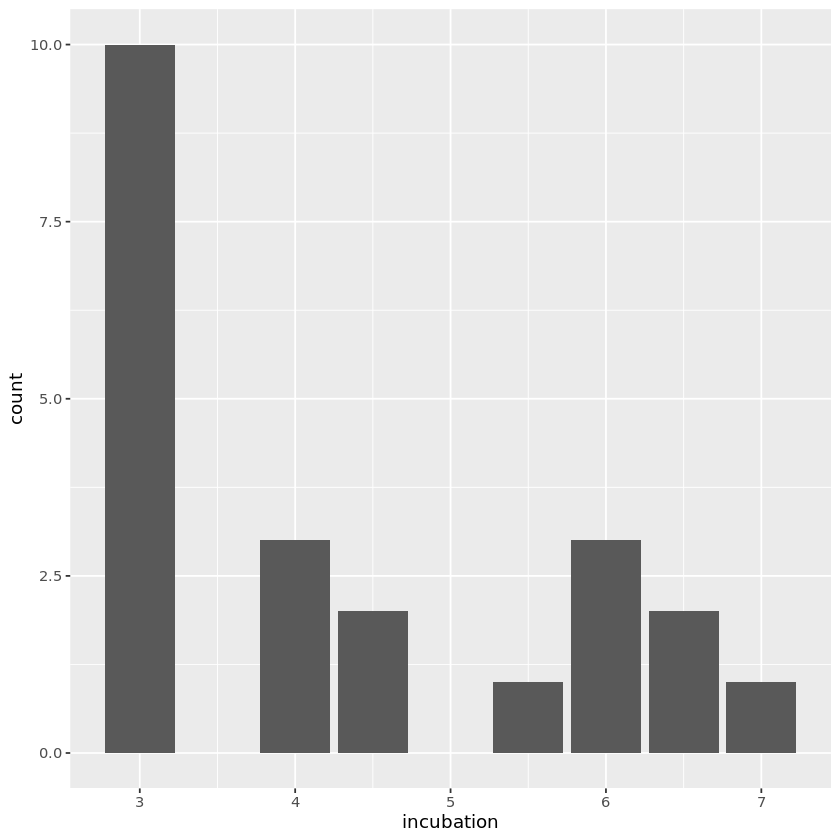

In [96]:
oswego2 %>%
  ggplot(aes(incubation)) +
  geom_bar()

Saving 6.67 x 6.67 in image


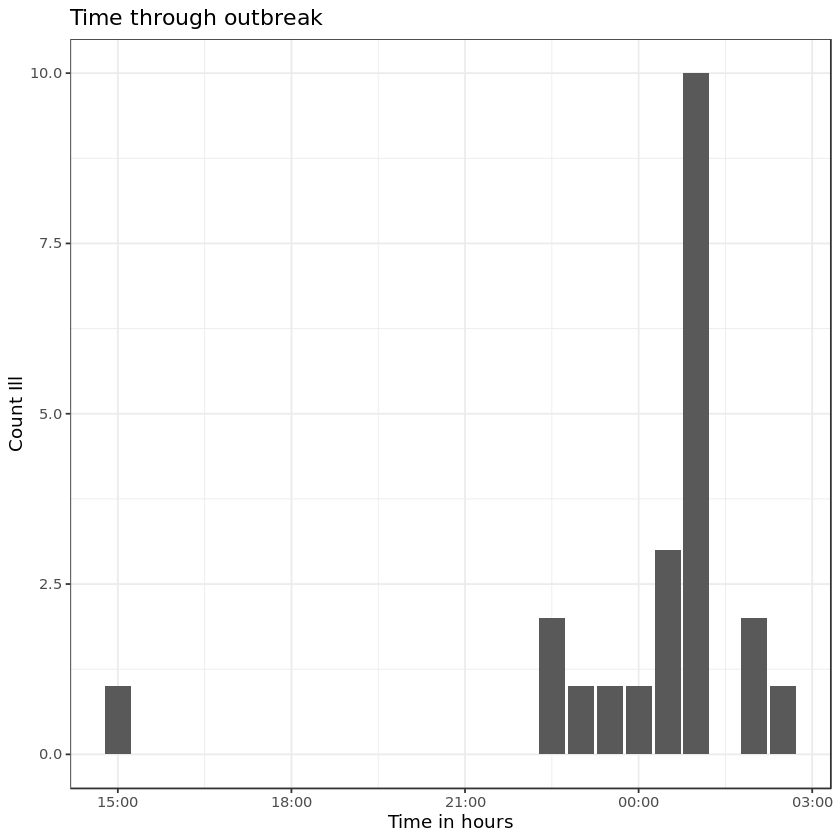

In [83]:
  ggplot(oswego2, aes(onset_dtm)) +
  geom_bar() +
  labs(x = "Time in hours",
      y = "Count Ill",
      title = "Time through outbreak") +
  theme_bw() +
  ggsave("outbreak1.png")


In [2]:
library(epitools)

In [3]:
data(package = 'epitools')

Package,Item,Title
<chr>,<chr>,<chr>
epitools,oswego,"Outbreak of Gastrointestinal Illness in Oswego County, 1940"
epitools,wcgs,Western Collaborative Group Study data
epitools,wnv,"West Nile Virus human cases reported in California, USA, as of December 14, 2004"


In [4]:
data(oswego)

In [5]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [8]:
oswego %>% 
  write_csv(path="outbreak.csv")

In [7]:
?write_csv

write_delim {readr},R Documentation
x,A data frame to write to disk
path,Path or connection to write to.
delim,"Delimiter used to separate values. Defaults to "" "" for write_delim(), "","" for write_excel_csv() and "";"" for write_excel_csv2(). Must be a single character."
na,String used for missing values. Defaults to NA. Missing values will never be quoted; strings with the same value as na will always be quoted.
append,"If FALSE, will overwrite existing file. If TRUE, will append to existing file. In both cases, if file does not exist a new file is created."
col_names,Write columns names at the top of the file? Must be either TRUE or FALSE.
quote_escape,"The type of escaping to use for quoted values, one of ""double"", ""backslash"" or ""none"". You can also use FALSE, which is equivalent to ""none"". The default is to double the quotes, which is the format excel expects."


In [103]:
length(oswego2$age)

[1] 22

In [107]:
oswego %>%
 head()

id,age,sex,meal.time,ill,onset.date,onset.time,baked.ham,spinach,mashed.potato,⋯,jello,rolls,brown.bread,milk,coffee,water,cakes,vanilla.ice.cream,chocolate.ice.cream,fruit.salad
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,52,F,8:00 PM,Y,4/19,12:30 AM,Y,Y,Y,⋯,N,Y,N,N,Y,N,N,Y,N,N
3,65,M,6:30 PM,Y,4/19,12:30 AM,Y,Y,Y,⋯,N,N,N,N,Y,N,N,Y,Y,N
4,59,F,6:30 PM,Y,4/19,12:30 AM,Y,Y,N,⋯,N,N,N,N,Y,N,Y,Y,Y,N
6,63,F,7:30 PM,Y,4/18,10:30 PM,Y,Y,N,⋯,Y,N,N,N,N,Y,N,Y,N,N
7,70,M,7:30 PM,Y,4/18,10:30 PM,Y,Y,Y,⋯,Y,Y,Y,N,Y,Y,N,Y,N,N
8,40,F,7:30 PM,Y,4/19,2:00 AM,N,N,N,⋯,N,N,N,N,N,N,N,Y,Y,N
